# Red Wine Quality
## Machine Learning MATH 2319 Project


### Author : Mutum Deva Neil Singh
### Student ID : S3773370

## Table of contents
- [Introduction](#intro)
- [Methodology](#method)
- [Importing the required libraries](#lib)
- [Data preprocessing](#pre)
- [Data exploration and visualisation](#explore)
- [Predictive modelling](#pred)
- [Model comparison](#model)
- [Result and discussion](#result)
- [References](#ref)

## Introduction <a name = "intro"></a>

The data chosen for the project is the **red wine data** downloaded from the UCI data repository. The target for the dataset is to predict the quality of the wine based on the contents of the wine. The aim of the project is to use a minimum of 3 supervised machine learning algorithms on the dataset. The alogrithms chosen for this project are - K-nearest neighbors (KNN), Decision Tree (DT) and (Gaussian) Naive Bayes (NB).

## Methodology <a name = "method"></a>

The modelling strategy is done by first trasnforming the target attribute to 0 and 1. The dataset was than scaled using min-max scaler which was then split into training and testing datasets. The split was done with 75% of the dataset being training and 25% of the dataset being testing data. **Random Forest Importance** method was used to select the best features. This was done before a particular classifier was fitted on the training data.
Feature selection together with hyperparameter search was used to conduct a 5-fold stratified cross-validation to fine-tune hyperparameters of each classifier using **Area Under Curve (AUC)**. After this, the tuned classifiers are then "fit" on the data using 10-fold cross validation in pairs and t-test is performed to check whether any performance difference is statistically significant.

## Importing the required libraries <a name = "lib"></a>

In [1]:
%%capture
!pip install --upgrade altair
!pip install vega vega_datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) 
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## Importing the data <a name = "data"></a>
The data was downloaded from the UCI data repository : https://archive.ics.uci.edu/ml/datasets/wine+quality
The data is based on the red wine variant of Portuguese "Vinho Verde" wine. There are a total of 12 attributed including the target variable. The target variable is the **quality** attribute. According to the data description, there are no missing values or any abnormal values in the dataset.

In [3]:
df = 'S3773370_Data.csv'
data = pd.read_csv(df, sep = ';', decimal = '.', header = 0)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data preprocessing <a name = "pre"></a>

The dataset as mentioned is the description is a clean dataset therefore, we do not have to perform data preprocessing. For this project we will be encoding the target value to **0 and 1** which corresponds to **low and high** quality of the wine. If the **quality** is less than or equal to 5, we will encode it as 0 and if the **quality** is greater than 5, we will encode it as 1.

In [4]:
# Encoding the target attribute
quality = []
for i in range (len(data['quality'])) :    
    if data.loc[i,'quality'] <= 5 :
        quality.append(0)
    else :
        quality.append(1)
        
data['quality'] = quality
data['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [5]:
wine_feature = data.drop(columns='quality')
wine_feature.head()
target = data['quality']

## Data exploration and visualisation <a name = "explore"></a>

Data exploration and visualisation is useful in checking the dependenices and other useful information required for the process of modelling. First, the shape and the data types of the dataset was checked. This was then followed by checking the descriptive statistics. One-variable, two-variable and three-variable plots were visualised to understand the data.

In [6]:
# Checking the shape of the dataset
data.shape

(1599, 12)

In [7]:
# Checking the data types of all the columns
print('\n The data types of all the columns in the dataset : \n')
data.dtypes


 The data types of all the columns in the dataset : 



fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
# Descriptive statistics
print('\n Summary statistics of all the columns in the dataset : \n')
data.describe(include = 'all')


 Summary statistics of all the columns in the dataset : 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


**One-variable plots :**

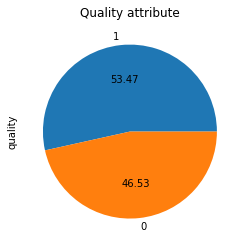

In [9]:
# Pie-chart of quality attribute
data['quality'].value_counts().plot(kind = 'pie',autopct = '%.2f')
plt.title('Quality attribute')
plt.show()

From the plot above, we can say that there are more high quality wine than low quality wine.

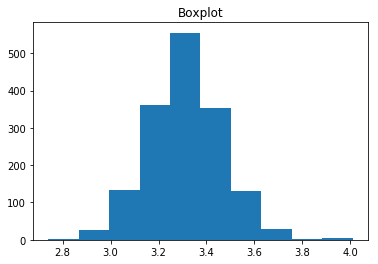

In [10]:
# Histogram of pH attribute
plt.hist(data['pH'])
plt.title("Boxplot")
plt.show()

From the plot above, we can say that the most of the wine have pH around 3.1 to 3.5.

**Two-variable plots :**

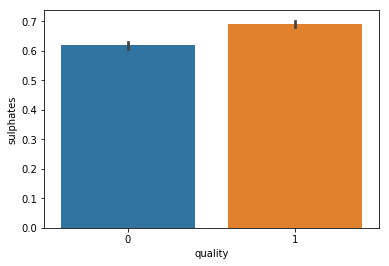

In [11]:
# Exploring quality vs sulphates attributes
sns.barplot(x = 'quality', y = 'sulphates',data = data)
plt.show()

From the plot above, we can say that high quality wine have more sulphates than low quality wine.

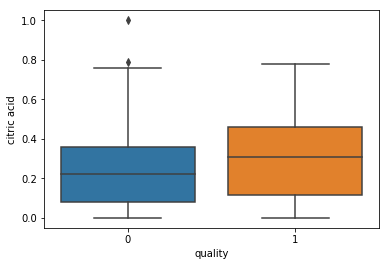

In [12]:
# Exploring quality vs citric acid
sns.boxplot('quality', 'citric acid', data = data)
plt.show()

From the above plot, we can say that high quality wine tend to have more citric acid in them.

**Three-variable plots :**

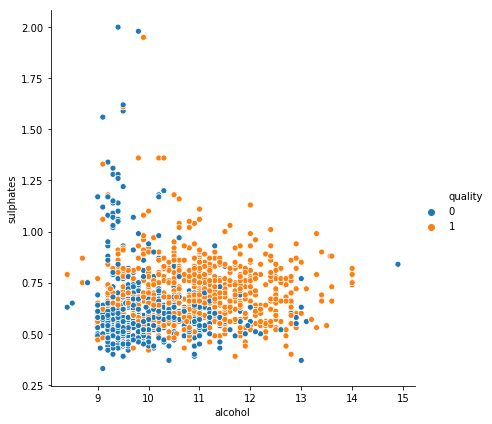

In [13]:
# Exploring alochol vs sulphates vs quality
sns.relplot(x="alcohol", 
            y="sulphates", 
            hue="quality", 
            height=6, 
            data=data);
plt.show()

From the above plot, we can say that low quality wine tend to have lower contents of sulphates and alcohol whereas high quality wine tend to have higher contents of sulphates and alcohol.

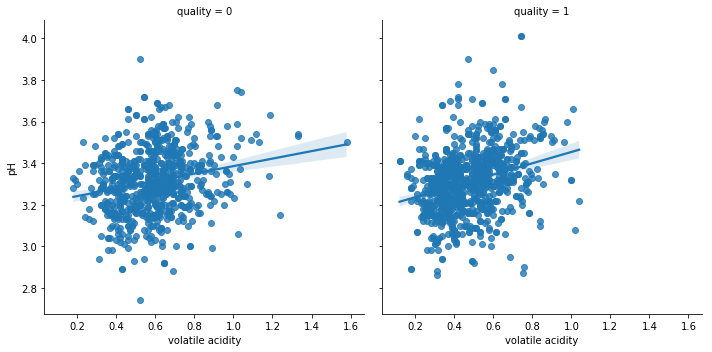

In [14]:
# Exploring volatile acidity vs pH vs quality
g = sns.lmplot(x="volatile acidity", 
               y="pH", 
               col="quality",
               truncate=True, 
               data=data)
g.set_axis_labels("volatile acidity","pH")

plt.show()

From the above plot, we can say there is some correlation between volatile acidity and pH. According to the plot, as pH increases as volatile acidity increases. We can also say that high quality wine have low pH and volatile acidity and low quality wine have high pH and volatile acidity.

## Predictive modelling <a name = "pred"></a>

**Feature scaling :**

In [15]:
# Scaling the features
from sklearn import preprocessing
wine = data.copy()
scaler = preprocessing.MinMaxScaler()
scaler.fit(wine_feature)
wine_feature = scaler.fit_transform(wine_feature)
pd.DataFrame(data, columns=wine.columns).sample(5, random_state=999)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1166,9.9,0.540,0.26,2.00,0.111,7.0,60.0,0.99709,2.94,0.98,10.2,0
353,13.5,0.530,0.79,4.80,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,0
1079,7.9,0.300,0.68,8.30,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,1
326,11.6,0.530,0.66,3.65,0.121,6.0,14.0,0.99780,3.05,0.74,11.5,1
916,5.3,0.715,0.19,1.50,0.161,7.0,62.0,0.99395,3.62,0.61,11.0,0


**Feature selection and ranking :**

In [16]:
from sklearn.ensemble import RandomForestClassifier

num_features = 5
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(wine_feature, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = wine.columns[fs_indices_rfi].values
best_features_rfi

array(['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide',
       'density'], dtype=object)

In [17]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.18280958, 0.12677201, 0.1096997 , 0.10071911, 0.08870612])

In [18]:
%config InlineBackend.figure_format = 'retina'
def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.85, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

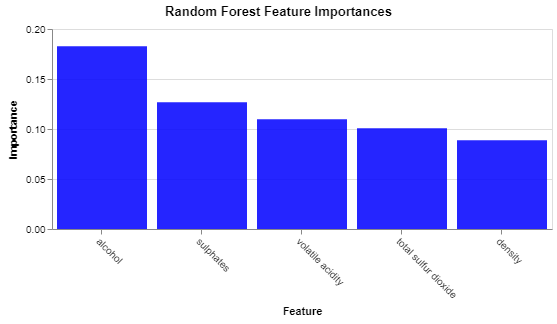

In [19]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', 'blue')

**Train-Test splitting :**

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, \
y_train, y_test = train_test_split(wine_feature, target, 
                                                    test_size = 0.25, random_state=999,
                                                    stratify = target)

print(x_train.shape)
print(x_test.shape)

(1199, 11)
(400, 11)


**Model Evaluation Strategy :**

In [21]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
cv_method = StratifiedKFold(n_splits=5, random_state=999)

### Hyperparameter Tuning

**K-Nearest Neighbors (KNN):**

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=5):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [5, 7, wine_feature.shape[1]],
                   'knn__n_neighbors': [1, 5, 10, 15, 20],
                   'knn__p': [1, 2]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 

In [24]:
gs_pipe_KNN.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 150 out of 150 | elapsed:  1.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('rfi_fs', RFIFeatureSelector(n_features_=5)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-2,
       param_grid={'rfi_fs__n_features_': [5, 7, 11], 'knn__n_neighbors': [1, 5, 10, 15, 20], 'knn__p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [25]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 20, 'knn__p': 2, 'rfi_fs__n_features_': 5}

In [26]:
gs_pipe_KNN.best_score_

0.8232413794548755

We observe that the optimal KNN model has a mean AUC score of **0.823**. The best performing KNN selected 5 features with 20 nearest neighbors and  p=2 , which is the Eucledian distance.

Below are other combinations to see if the difference is rather significant or not. For this, we will make use of the function below to format the grid search outputs as a Pandas data frame.

In [27]:
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [28]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
27,0.823288,0.034395,0.866836,0.762626,20.0,2.0,5.0
25,0.820377,0.045894,0.856665,0.730783,20.0,1.0,7.0
24,0.816775,0.040056,0.860888,0.742920,20.0,1.0,5.0
18,0.816512,0.042843,0.861944,0.735003,15.0,1.0,5.0
22,0.816323,0.042953,0.862261,0.736154,15.0,2.0,7.0


From the table above we can see taht the difference between the combinations of hyperparameters is not really great when the number of features selected is conditioned.

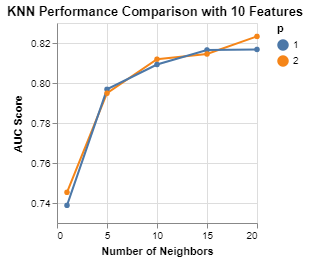

In [29]:
results_KNN_10_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 5.0]

alt.Chart(results_KNN_10_features, 
          title='KNN Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='p')
)

**(Gaussian) Naive Bayes (NB)**

Gaussian Naive Bayes model requires each feature to have a Gaussian distribution therefore, the input data was first power transformed to meet the criteria.

In [30]:
from sklearn.preprocessing import PowerTransformer
x_train_transformed = PowerTransformer().fit_transform(x_train)

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [5, 7, wine_feature.shape[1]],
                  'nb__var_smoothing': np.logspace(1,-3, num=200)}

n_iter_search = 20
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          n_iter=n_iter_search,
                          verbose=1) 

gs_pipe_NB.fit(x_train_transformed, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:   36.7s finished


In [32]:
gs_pipe_NB.best_params_

{'rfi_fs__n_features_': 5, 'nb__var_smoothing': 0.0027682866303920667}

In [53]:
gs_pipe_NB.best_score_

0.823797805660871

The optimal NB yiels an AUC score of 0.823 with a 5 features which is similar to that of KNN. To see which model outperforms the other, we need to perform a paired t-test on the test data.

In [33]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,nb__var_smoothing
12,0.823863,0.033016,0.877182,0.779855,5.0,0.002768
11,0.823835,0.033110,0.877323,0.779715,5.0,0.004824
5,0.823775,0.034235,0.877463,0.777274,5.0,0.112267
4,0.823612,0.033021,0.876548,0.779506,5.0,0.035297
18,0.823468,0.034527,0.877463,0.776437,5.0,0.128989


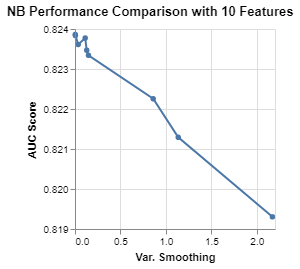

In [34]:
results_NB_10_features = results_NB[results_NB['rfi_fs__n_features_'] == 5.0]

alt.Chart(results_NB_10_features, 
          title='NB Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('nb__var_smoothing', title='Var. Smoothing'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False))
)

**Decision Trees (DT)**

In [35]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(criterion='gini', random_state=111))])

params_pipe_DT = {'rfi_fs__n_features_': [5, 7, wine_feature.shape[1]],
                  'dt__max_depth': [3, 4, 5],
                  'dt__min_samples_split': [2, 5]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done  90 out of  90 | elapsed:   34.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('rfi_fs', RFIFeatureSelector(n_features_=5)), ('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=111,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-2,
       param_grid={'rfi_fs__n_features_': [5, 7, 11], 'dt__max_depth': [3, 4, 5], 'dt__min_samples_split': [2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [36]:
gs_pipe_DT.best_params_

{'dt__max_depth': 4, 'dt__min_samples_split': 5, 'rfi_fs__n_features_': 7}

In [37]:
gs_pipe_DT.best_score_

0.7728049254078698

The best DT has a maximum depth of  and minimum split value of 5 samples and 7 features with an AUC score of 0.772. We can say that KNN and NB performs DT by a good margin.

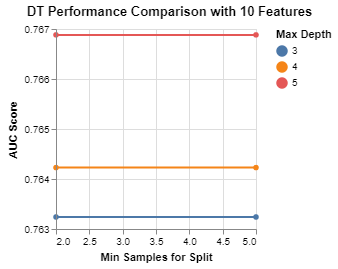

In [38]:
results_DT = get_search_results(gs_pipe_DT)

results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 5.0]

alt.Chart(results_DT_10_features, 
          title='DT Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)


Since the score of DT was quite low, we can try to improve the score by fine tuning it further.

**Further fine-tuning of DT :**

In [39]:
params_pipe_DT2 = {'rfi_fs__n_features_': [5],
                  'dt__max_depth': [5, 10, 15],
                  'dt__min_samples_split': [5, 50, 100, 150]}

gs_pipe_DT2 = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT2, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT2.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done  60 out of  60 | elapsed:   22.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('rfi_fs', RFIFeatureSelector(n_features_=5)), ('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=111,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-2,
       param_grid={'rfi_fs__n_features_': [5], 'dt__max_depth': [5, 10, 15], 'dt__min_samples_split': [5, 50, 100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [40]:
gs_pipe_DT2.best_params_

{'dt__max_depth': 10, 'dt__min_samples_split': 50, 'rfi_fs__n_features_': 5}

In [41]:
gs_pipe_DT2.best_score_

0.7890552207437675

We can see that even after fine-tuning the DT more the score does not change much. The new score is around 0.789.

In [42]:
results_DT = get_search_results(gs_pipe_DT2)
results_DT.head()

,mean_score,std_score,max_score,min_score,dt__max_depth,dt__min_samples_split,rfi_fs__n_features_
5,0.789134,0.039543,0.833439,0.729143,10.0,50.0,5.0
9,0.787627,0.038717,0.833439,0.729143,15.0,50.0,5.0
6,0.781082,0.033909,0.826858,0.733050,10.0,100.0,5.0
10,0.781082,0.033909,0.826858,0.733050,15.0,100.0,5.0
1,0.780352,0.043247,0.841146,0.721959,5.0,50.0,5.0


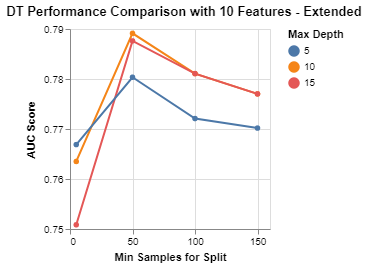

In [43]:
results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 5.0]

alt.Chart(results_DT_10_features, 
          title='DT Performance Comparison with 10 Features - Extended'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

## Model comparison <a name = "model"></a>

In this process, we **"fit"** the tuned classifiers on the test data in a cross-validated fashion to figure out which (tuned) classifier performs the best. This is done so that we can measure the performance of the tuned classifiers on a data that they have not seen before. A paited t-test for the AUC score between the classifiers was also conducted.

In [44]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = StratifiedKFold(n_splits=10, random_state=111)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=x_test,
                                 y=y_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.7890604035340877

In [45]:
x_test_transformed = PowerTransformer().fit_transform(x_test)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=x_test_transformed,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean()

0.8068124857598542

In [46]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT2.best_estimator_,
                                X=x_test,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT.mean()

0.7706754259385838

In [47]:
from scipy import stats

print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print(stats.ttest_rel(cv_results_DT, cv_results_KNN))
print(stats.ttest_rel(cv_results_DT, cv_results_NB))

Ttest_relResult(statistic=-2.3788394146638137, pvalue=0.04130619328740945)
Ttest_relResult(statistic=-0.8532252954624014, pvalue=0.4156640322023598)
Ttest_relResult(statistic=-1.7260783947235165, pvalue=0.11841146421356982)


We can see that NB outperforms both KNN and DT when we fitted the models on unseen data ie; the test data. The score of KNN, NB and DT are: 0.789, 0.806 and 0.770 respectively. A p-value less than 0.05 suggests a statistically significant difference. But according to the the p-values above, none are statistically significantly different. Metrics such as Precision, Recall, Confusion matrix etc can be used to compare the models.

In [48]:
pred_KNN = gs_pipe_KNN.predict(x_test)

In [49]:
x_test_transformed = PowerTransformer().fit_transform(x_test)
pred_NB = gs_pipe_NB.predict(x_test_transformed)

In [50]:
pred_DT = gs_pipe_DT2.predict(x_test)

In [51]:
from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(y_test, pred_KNN))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(y_test, pred_NB))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(y_test, pred_DT))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       186
           1       0.76      0.74      0.75       214

   micro avg       0.73      0.73      0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.74      0.73      0.74       400


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       186
           1       0.77      0.74      0.76       214

   micro avg       0.74      0.74      0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       186
           1       0.76      0.68      0.72       214

   micro avg       0.72      0.72      0.72       400
  

From the classification report above, we see that KNN and NB have the same recall and DT has the lowest recall among the three.

In [52]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(y_test, pred_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(y_test, pred_NB))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(y_test, pred_DT))


Confusion matrix for K-Nearest Neighbor
[[136  50]
 [ 56 158]]

Confusion matrix for Naive Bayes
[[138  48]
 [ 55 159]]

Confusion matrix for Decision Tree
[[141  45]
 [ 68 146]]


## Result and discussion <a name = "result"></a>

The K-Nearest Neighbors with 5 features selected by the Random Forest Importance (RFI) and Naive Bayes with 5 features selected by RFI produced the highest cross-validated AUC score on the training data. But when the models were evaluated on the test data, Naive Bayes model outperforms both KNN and DT. The NB and KNN models had the same recall score on the test data.

## References <a name = "ref"></a>
- UCI data repository : https://archive.ics.uci.edu/ml/datasets/wine+quality
- Featureranking case study : https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/#3
- Jones E, Oliphant E, Peterson P, et al. SciPy: Open Source Scientific Tools for Python, 2001-, http://www.scipy.org/ [Accessed 2019-05-26]
- Lichman, M. (2013). UCI Machine Learning Repository: Census Income Data Set [online]. Available at https://archive.ics.uci.edu/ml/datasets/adult [Accessed 2019-05-26]
- Pedregosa et al. (2011). Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825- 2830
- Travis E, Oliphant (2006). A guide to NumPy, USA: Trelgol Publishing